In [1]:
import sys
sys.path.insert(0, 'src') 
sys.path.insert(0, '/data/ch52669/gene_interaction/tot-gene-sets/MedAgents') 
import os
import json
from functools import partial

In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
import argparse
from tot.methods.bfs import solve
from tot.tasks.bio_name import Bio_Name

In [4]:
import argparse

medagents_config = {'model_name':'gpt-3.5-turbo-1106', \
                    'method':'syn_verif', \
                    'max_attempt_vote':3,\
                    'ans_num':2,\
                    'numerical':True
                   }

tot_config = {'backend':'gpt-3.5-turbo-1106', 'temperature':0.7, 'task':'bio_name', 'naive_run':False, \
              'prompt_sample':None, 'method_generate':'sample_bionames', \
              'method_evaluate':'medagents_w_tools', 'method_select':'greedy', \
              'n_generate_sample':3, 'n_evaluate_sample':2, 'n_select_sample':2, \
              'source':'GO:BP', 'bio_type':"Biological Process",'filter_method':'sim', \
              'filter_size':5, 'voting_setting':None}

args_config = {**medagents_config, **tot_config}


args = argparse.Namespace(**args_config)
print('args', args)
task = Bio_Name()

args Namespace(model_name='gpt-3.5-turbo-1106', method='syn_verif', max_attempt_vote=3, ans_num=2, numerical=True, backend='gpt-3.5-turbo-1106', temperature=0.7, task='bio_name', naive_run=False, prompt_sample=None, method_generate='sample_bionames', method_evaluate='medagents_w_tools', method_select='greedy', n_generate_sample=3, n_evaluate_sample=2, n_select_sample=2, source='GO:BP', bio_type='Biological Process', filter_method='sim', filter_size=5, voting_setting=None)


In [5]:
def test_example(args, task, idx):
    label = task.get_label(idx)
    final_answer, ys, steps, trie = solve(args, task, idx)
    return final_answer, ys, steps, label, trie

In [6]:
final_answer, ys, steps, label, trie = test_example(args, task, 1)

use_tool


Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


question_classifier You are a biology expert who specializes in categorizing a specific biology question into specific areas of biology (e.g., Molecular Biology, Biochemistry, Pathology, Microbiology).
Generating response for engine:  gpt-3.5-turbo-1106
Finish!
Time taken:  0.9922266006469727
raw_question_domain Biology Field: Genetics | Developmental Biology | Cell Signaling | Molecular Biology | Biochemistry
question_domains ['Genetics', 'Developmental Biology', 'Cell Signaling', 'Molecular Biology', 'Biochemistry']
Generating response for engine:  gpt-3.5-turbo-1106
Finish!
Time taken:  1.4544200897216797
options_domains ['Molecular Biology', 'Developmental Biology']
Generating response for engine:  gpt-3.5-turbo-1106
Finish!
Time taken:  7.871811628341675
Generating response for engine:  gpt-3.5-turbo-1106
Finish!
Time taken:  7.594332456588745
Generating response for engine:  gpt-3.5-turbo-1106
Finish!
Time taken:  8.854745388031006
Generating response for engine:  gpt-3.5-turbo-1

Finish!
Time taken:  7.97381067276001
Generating response for engine:  gpt-3.5-turbo-1106
Finish!
Time taken:  7.2499680519104
q_analyses_text Report0 
Question: Here is the set of genes: SHH BMP5 FGF10 SULF1 EGFR NODAL TP63 FGFR2 SOSTDC1 CTNNB1 AR WNT2B LUZP1 HOXD13 CECR2 NOG GDF7 RDH10 WNT2 OVOL2 HIF1A BMP7 BMP4 WNT5A
. What are the two most prominent biological processes performed by the system?. 
Domain: Genetics 
Analysis: The question is asking about the prominent biological processes performed by the set of genes listed. These genes are all involved in various signaling pathways and developmental processes. By examining the functions of these genes, we can identify the biological processes they are involved in. From the list of genes provided, it is evident that many of them are involved in developmental processes, particularly in the development of various tissues and organs. Genes such as SHH, BMP4, BMP5, FGF10, NODAL, TP63, FGFR2, WNT2B, HOXD13, NOG, and GDF7 are known to pla

Finish!
Time taken:  6.168220043182373
syn_report Question: Here is the set of genes: SHH BMP5 FGF10 SULF1 EGFR NODAL TP63 FGFR2 SOSTDC1 CTNNB1 AR WNT2B LUZP1 HOXD13 CECR2 NOG GDF7 RDH10 WNT2 OVOL2 HIF1A BMP7 BMP4 WNT5A
. What are the two most prominent biological processes performed by the system?. 
Options: {'A': 'Embryonic Development', 'B': 'Cell Signaling', 'C': 'Tissue Homeostasis'} 
Total Analysis: The system of genes listed is primarily involved in embryonic development, tissue differentiation, and cell signaling pathways that regulate cell behavior. These genes play crucial roles in embryonic patterning, organogenesis, tissue morphogenesis, and the regulation of cell growth, proliferation, and differentiation. The consensus among experts from Genetics, Developmental Biology, Cell Signaling, Molecular Biology, and Biochemistry supports the prominence of embryonic development and cell signaling as the two most prominent biological processes associated with the listed genes. Tiss

use_tool
question_classifier You are a biology expert who specializes in categorizing a specific biology question into specific areas of biology (e.g., Molecular Biology, Biochemistry, Pathology, Microbiology).
Generating response for engine:  gpt-3.5-turbo-1106
Finish!
Time taken:  0.7480640411376953
raw_question_domain Biology Field: Genetics | Developmental Biology | Molecular Biology | Cell Biology | Biochemistry
question_domains ['Genetics', 'Developmental Biology', 'Molecular Biology', 'Cell Biology', 'Biochemistry']
Generating response for engine:  gpt-3.5-turbo-1106
Finish!
Time taken:  1.5290939807891846
options_domains ['Biology']
Generating response for engine:  gpt-3.5-turbo-1106
Finish!
Time taken:  7.516132354736328
Generating response for engine:  gpt-3.5-turbo-1106
Finish!
Time taken:  4.872320652008057
Generating response for engine:  gpt-3.5-turbo-1106
Finish!
Time taken:  7.282504320144653
Generating response for engine:  gpt-3.5-turbo-1106
Finish!
Time taken:  8.271

Finish!
Time taken:  7.857328653335571
q_analyses_text Report0 
Question: Here is the set of genes: SHH BMP5 FGF10 SULF1 EGFR NODAL TP63 FGFR2 SOSTDC1 CTNNB1 AR WNT2B LUZP1 HOXD13 CECR2 NOG GDF7 RDH10 WNT2 OVOL2 HIF1A BMP7 BMP4 WNT5A
. What are the two most prominent biological processes performed by the system?. 
Domain: Genetics 
Analysis: The question is asking about the prominent biological processes performed by the set of genes listed. These genes are all involved in various signaling pathways and developmental processes. From the list of genes provided, it seems that the question is related to the genetic regulation of embryonic development, cell differentiation, and tissue patterning.

Based on the genes listed, the two most prominent biological processes performed by the system are likely to be embryonic development and cell differentiation. Many of the genes listed are known to play crucial roles in these processes. For example, SHH (Sonic Hedgehog) is involved in patterning 

Finish!
Time taken:  5.657120943069458
syn_report Question: Here is the set of genes: SHH BMP5 FGF10 SULF1 EGFR NODAL TP63 FGFR2 SOSTDC1 CTNNB1 AR WNT2B LUZP1 HOXD13 CECR2 NOG GDF7 RDH10 WNT2 OVOL2 HIF1A BMP7 BMP4 WNT5A
. What are the two most prominent biological processes performed by the system?. 
Options: {'A': 'Limb Bud Development', 'B': 'Organogenesis', 'C': 'BMP Signaling Pathway Activation', 'D': 'Wnt Signaling Pathway', 'E': 'BMP Signaling Pathway', 'F': 'EGFR Signaling Pathway'} 
Total Analysis: Based on the analysis provided by experts from genetics, developmental biology, molecular biology, cell biology, biochemistry, and GProfiler, it is evident that the set of genes listed is associated with crucial biological processes such as embryonic development, cell signaling, tissue differentiation, and organogenesis. The genes play significant roles in regulating cell growth, differentiation, and patterning during embryonic development, as well as in the maintenance and different

use_tool
question_classifier You are a biology expert who specializes in categorizing a specific biology question into specific areas of biology (e.g., Molecular Biology, Biochemistry, Pathology, Microbiology).
Generating response for engine:  gpt-3.5-turbo-1106
Finish!
Time taken:  1.0092318058013916
raw_question_domain Biology Field: Genetics | Developmental Biology | Molecular Biology | Cell Biology | Biochemistry
question_domains ['Genetics', 'Developmental Biology', 'Molecular Biology', 'Cell Biology', 'Biochemistry']
Generating response for engine:  gpt-3.5-turbo-1106
Finish!
Time taken:  1.9870026111602783
options_domains ['The question provided involves a set of genes and asks about the most prominent biological processes performed by the system. The options provided are related to specific biological processes and pathways. To address this question, the two most relevant fields of expertise needed are developmental biology and']
Generating response for engine:  gpt-3.5-turbo-1

Finish!
Time taken:  8.814133644104004
q_analyses_text Report0 
Question: Here is the set of genes: SHH BMP5 FGF10 SULF1 EGFR NODAL TP63 FGFR2 SOSTDC1 CTNNB1 AR WNT2B LUZP1 HOXD13 CECR2 NOG GDF7 RDH10 WNT2 OVOL2 HIF1A BMP7 BMP4 WNT5A
. What are the two most prominent biological processes performed by the system?. 
Domain: Genetics 
Analysis: The question is asking about the prominent biological processes performed by the set of genes listed. These genes are all involved in various signaling pathways and developmental processes. By analyzing the functions of these genes, we can identify the biological processes they are associated with.

From the list of genes provided, it is evident that many of them are involved in signaling pathways crucial for embryonic development, tissue differentiation, and organogenesis. For example, SHH (Sonic Hedgehog) is involved in patterning of the developing embryo, BMP4 and BMP7 (Bone Morphogenetic Proteins) are involved in bone and cartilage development,

Finish!
Time taken:  7.569244384765625
syn_report Question: Here is the set of genes: SHH BMP5 FGF10 SULF1 EGFR NODAL TP63 FGFR2 SOSTDC1 CTNNB1 AR WNT2B LUZP1 HOXD13 CECR2 NOG GDF7 RDH10 WNT2 OVOL2 HIF1A BMP7 BMP4 WNT5A
. What are the two most prominent biological processes performed by the system?. 
Options: {'A': 'Limb Development', 'B': 'Lung Development', 'C': 'Bone Development', 'D': 'Canonical Wnt Signaling Pathway', 'E': 'Non-Canonical Wnt Signaling Pathway', 'F': 'Wnt/β-Catenin-Independent Wnt Signaling Pathway'} 
Total Analysis: Based on the analysis provided by experts in genetics, developmental biology, molecular biology, cell biology, biochemistry, and GProfiler, it is evident that the most prominent biological processes performed by the system of genes listed are related to embryonic development and tissue differentiation. These processes are crucial for the formation and maintenance of the body's complex structures and functions. Limb development, lung development, and bo

In [7]:
dot = trie.visualize()

In [ ]:
ids = [0,1,2]
values = [1,0,0]
sorted(ids, key=lambda x: values[x], reverse=True)[:1]

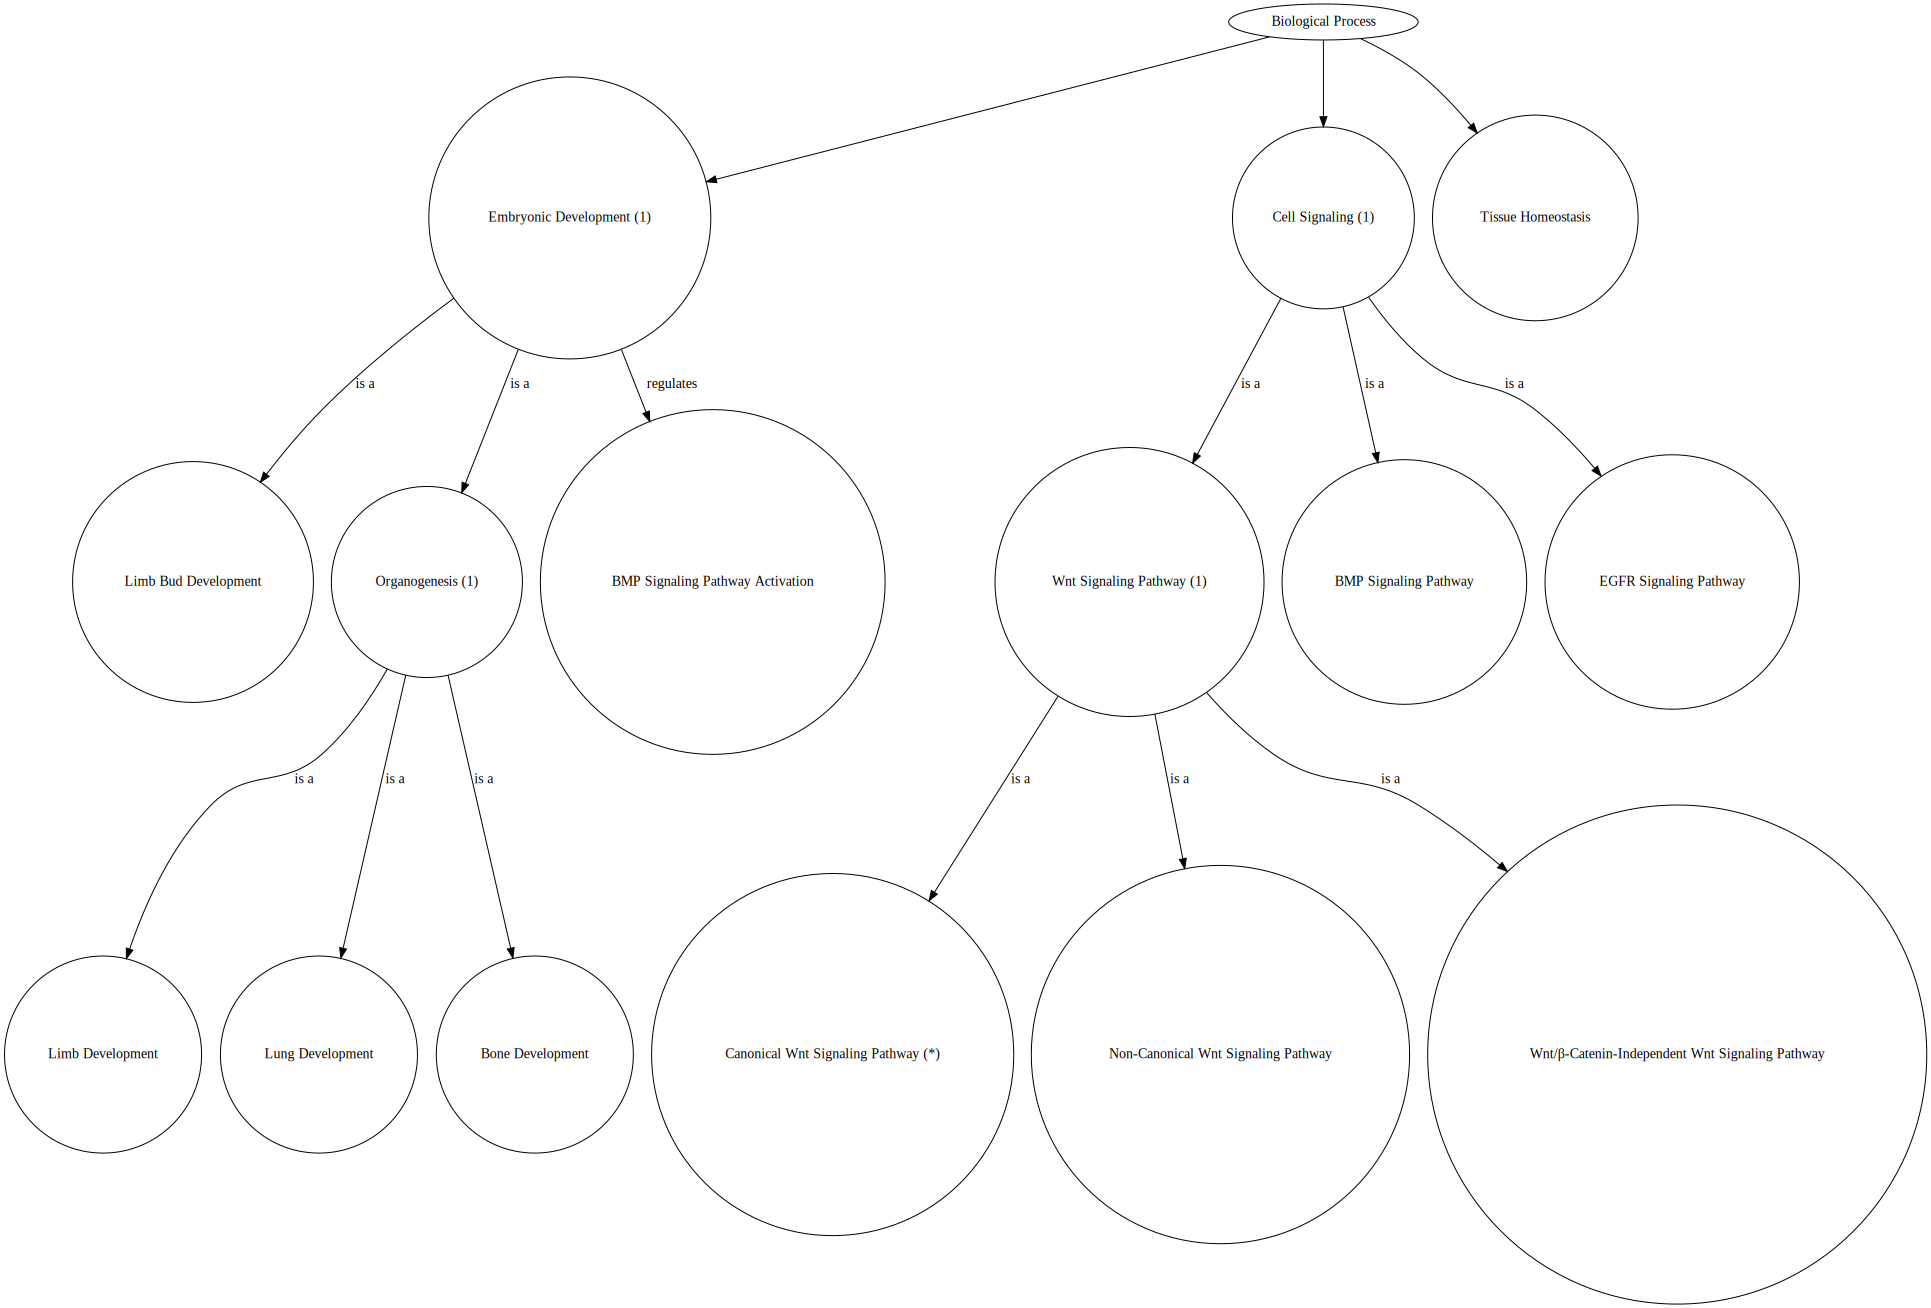

In [8]:
dot

In [9]:
final_answer

'Canonical Wnt Signaling Pathway'

In [10]:
label

'morphogenesis of an epithelial fold\n'